In [1]:
#numerical lab revision

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [4]:
display(customer_df.shape)
customer_df.head()

(9134, 24)

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [5]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [6]:
# no NaN-Values
round(customer_df.isna().sum()/len(customer_df),4)*100

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [7]:
# standardize headers
customer_df.columns = [e.lower().replace(' ', '_') for e in customer_df.columns]
customer_df = customer_df.rename(columns={'employmentstatus': 'employment_status'})
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [8]:
### date/time format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [9]:
customer_df['customer'].value_counts()

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

In [10]:
customer_df['customer'].nunique()
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [11]:
def diff_continuous_discrete(df):   
    df_num = df.select_dtypes(np.number)
    
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()

    for column in df_num:
        if ((df_num[column].nunique()/len(df_num)*100) > 20):
            continuous_df = pd.concat([continuous_df, df_num[column]], axis = 1)
        else:
            discrete_df = pd.concat([discrete_df, df_num[column]], axis = 1)
    
    display(discrete_df.head())
    display(continuous_df.head())
    return discrete_df, continuous_df

discrete_df, continuous_df = diff_continuous_discrete(customer_df)

monthly_premium_auto  months_since_last_claim  \
0                    69                       32   
1                    94                       13   
2                   108                       18   
3                   106                       18   
4                    73                       12   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   number_of_policies  
0                   1  
1                   8  
2                   2  
3                   7  
4                   1

customer_lifetime_value  income  total_claim_amount
0              2763.519279   56274          384.811147
1              6979.535903       0         1131.464935
2             12887.431650   48767          566.472247
3              7645.861827       0          529.881344
4              2813.692575   43836          138.130879

In [12]:
corr_matrix = customer_df.select_dtypes(np.number).corr()
corr_matrix

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                 1.000000   
months_since_policy_inception              0.020257                -0.042959   
number_of_open_complaints                 -0.013122                 0.005354   
number_of_policies                        -0.011233                 0.009136   
total_claim_amount                         0.632017                 0.007563   

                               months_since_policy_inception  \
customer_lifetime_value                             0.009418   
income                                             -0.000875   
monthly_premium_auto                                0.020257   
months_since_last_claim                            -0.042959   
months_since_policy_inception                       1.000000   
number_of_open_complaints                          -0.001158   
number_of_policies                                 -0.013333   
total_claim_amount                                  0.003335   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.036343            0.021955   
income                                          0.006408           -0.008656   
monthly_premium_auto                           -0.013122           -0.011233   
months_since_last_claim                         0.005354            0.009136   
months_since_policy_inception                  -0.001158           -0.013333   
number_of_open_complaints                       1.000000            0.001498   
number_of_policies                              0.001498            1.000000   
total_claim_amount                             -0.014241           -0.002354   

                               total_claim_amount  
customer_lifetime_value                  0.226451  
income                                  -0.355254  
monthly_premium_auto                     0.632017  
months_since_last_claim                  0.007563  
months_since_policy_inception            0.003335  
number_of_open_complaints               -0.014241  
number_of_policies                      -0.002354  
total_claim_amount                       1.000000

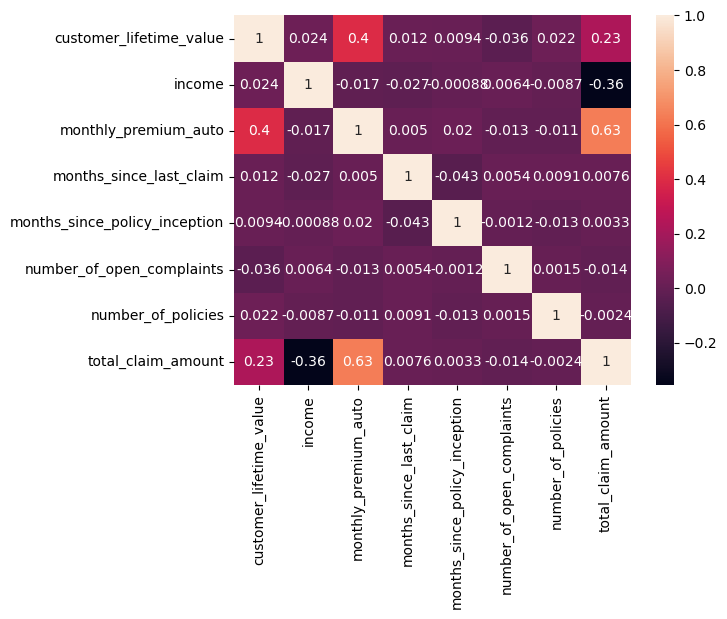

In [13]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

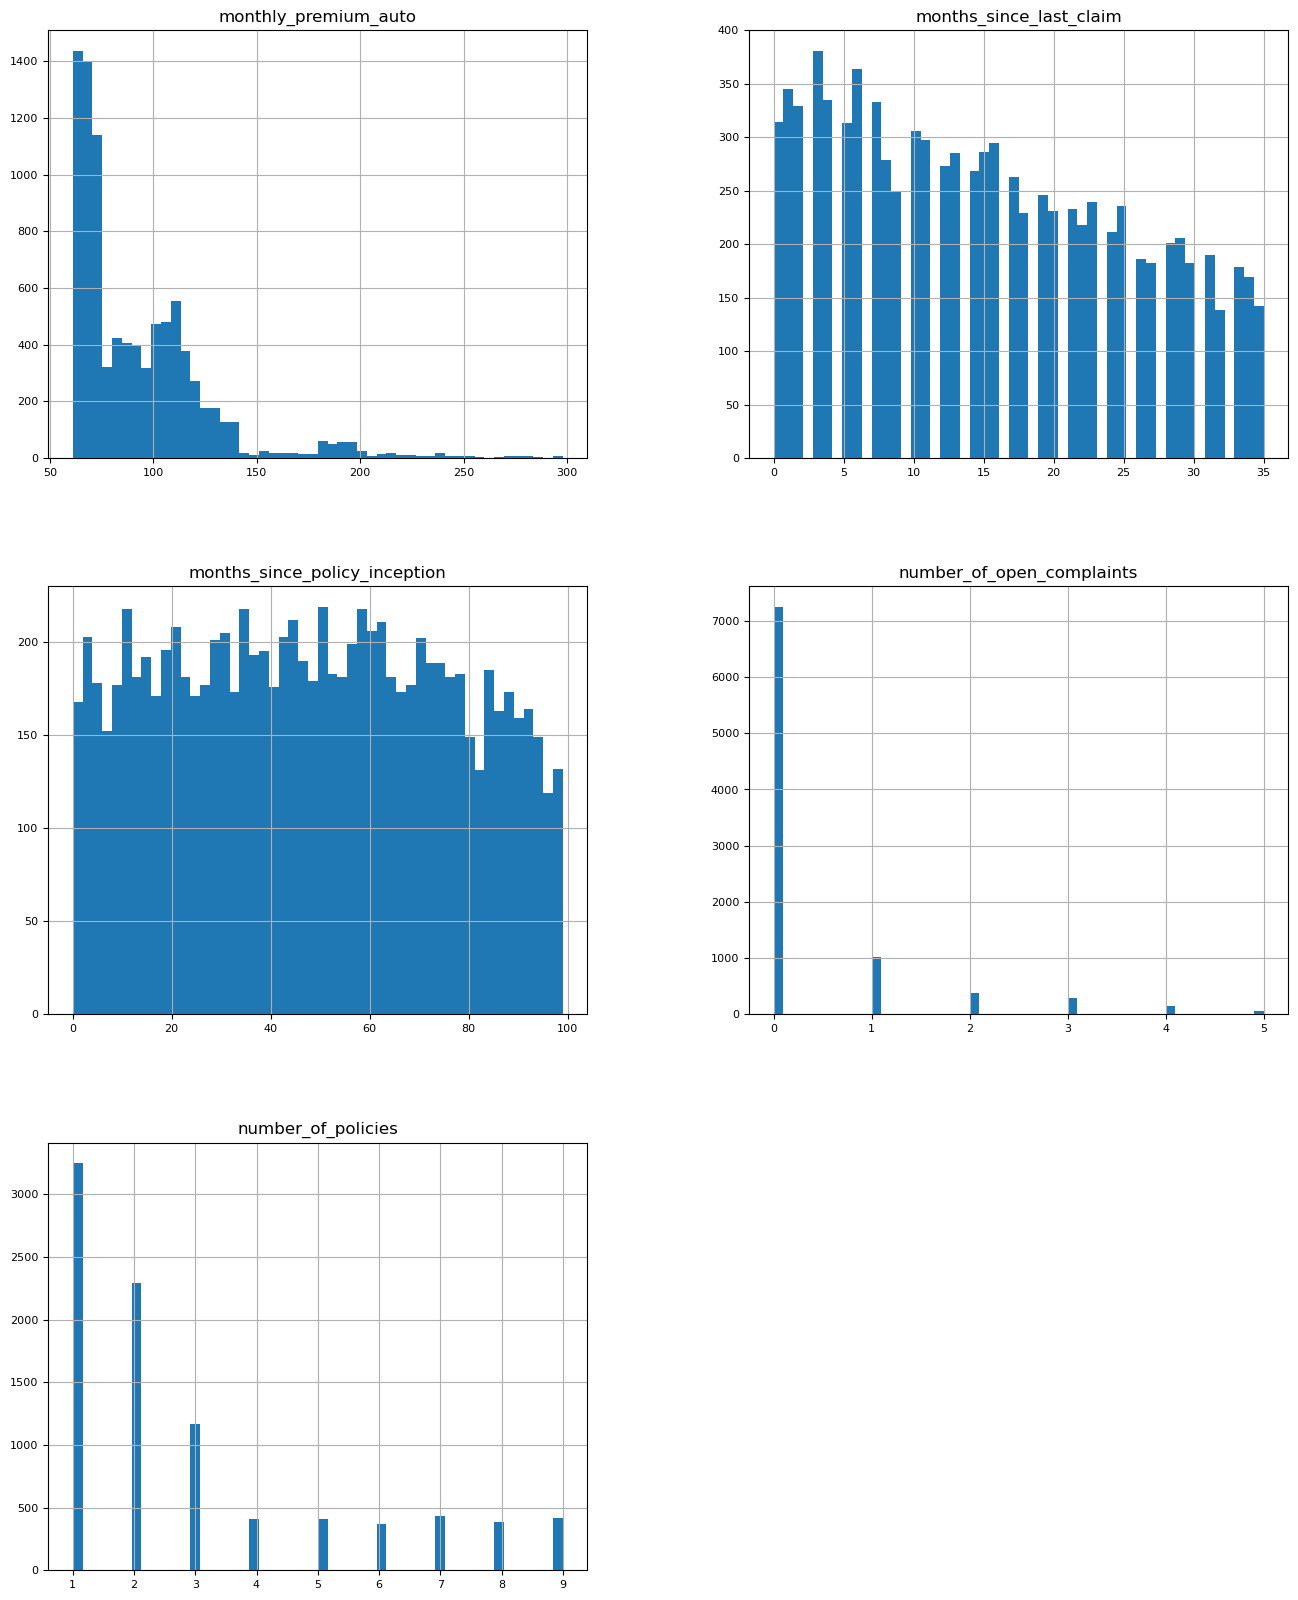

In [14]:
def plot_discrete(discrete_df):
    discrete_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    
plot_discrete(discrete_df)

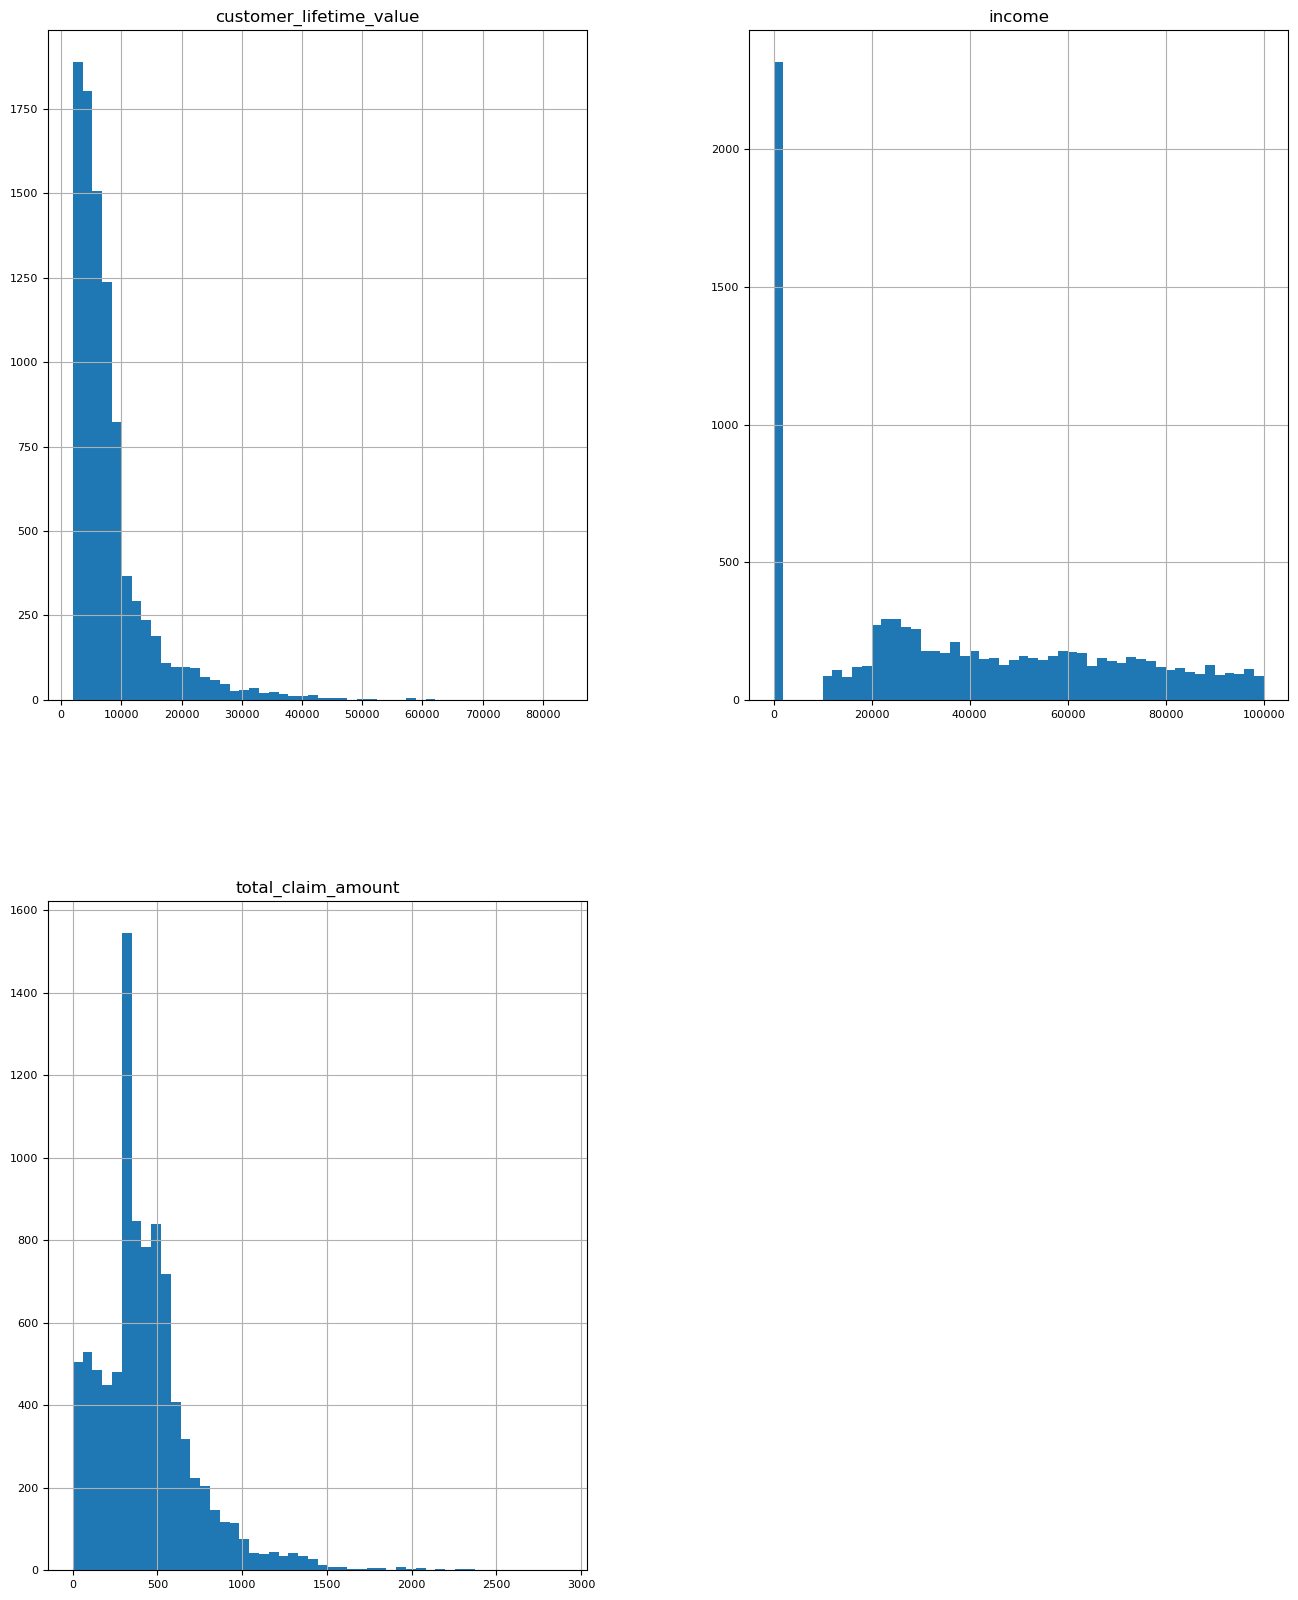

In [15]:
def plot_continuous(continuous_df):
    continuous_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

plot_continuous(continuous_df)

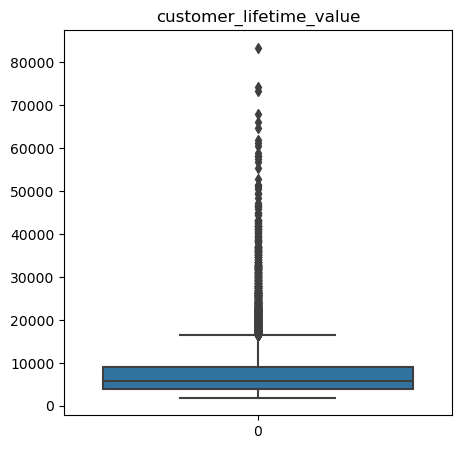

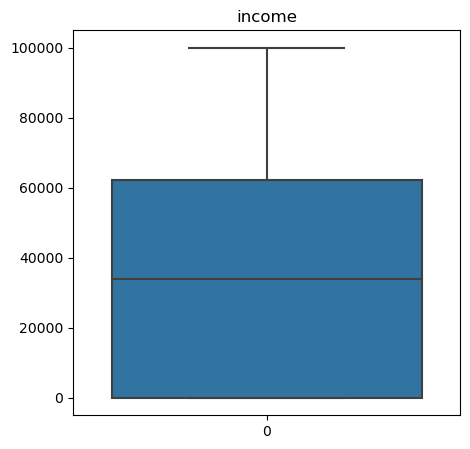

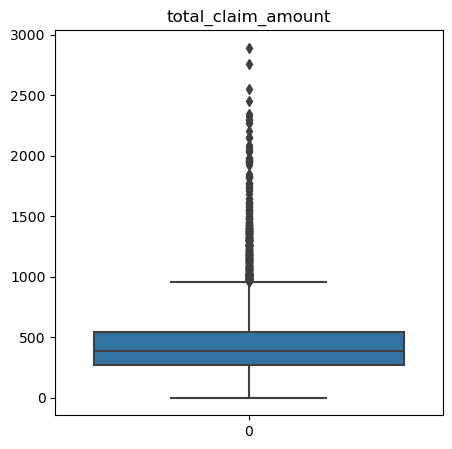

In [16]:
def plot_continuous_boxplot(continuous_df):
    for column in continuous_df.columns:
        plt.figure(figsize=(5, 5))
        plt.title(column)
        sns.boxplot(data=continuous_df[column])
plot_continuous_boxplot(continuous_df)

In [17]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(customer_df['customer_lifetime_value'],75) - np.nanpercentile(customer_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(customer_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = customer_df[customer_df['customer_lifetime_value'] > 60000] # We do a visual inspection and see that all the numbers over 60'000 should be removed!
len(extraordinary_points)  # This checks the number of points that will be removed

# we already checked the NaN - Values before!
customer_df = customer_df[customer_df['customer_lifetime_value'] <= 60000]

16414.039911750002


In [18]:
customer_df = customer_df[customer_df['customer_lifetime_value'] <= 60000]

In [19]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(customer_df['total_claim_amount'],75) - np.nanpercentile(customer_df['total_claim_amount'],25)
upper_limit = np.nanpercentile(customer_df['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = customer_df[customer_df['total_claim_amount'] > 2000] # We do a visual inspection and see that all the numbers over 2000 should be removed!
len(extraordinary_points)  # This checks the number of points that will be removed

# we already checked the NaN - Values before!
customer_df = customer_df[customer_df['total_claim_amount'] <= 2000]

959.7071520000002


In [20]:
# We drop the rows that are above 2000
customer_df = customer_df[customer_df['total_claim_amount'] <= 2000]
# however, using <= also removes the rows for which TIMELAG is NaN, se we would need to fillna first!

In [21]:
customer_df.shape

(9107, 24)

In [22]:
# customer_df.to_csv('numerical.csv')

In [23]:
# customer_df.to_csv('numerical_no_index.csv', index=False)

In [24]:
# customer_df.to_excel("numerical.xlsx")

In [25]:
# customer_df.to_excel('numerical_no_index.xlsx', index=False)

In [26]:
categorical_df = customer_df.select_dtypes(np.object)
categorical_df.head()

C:\Users\it-it\AppData\Local\Temp\ipykernel_10292\3832337599.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = customer_df.select_dtypes(np.object)


customer       state response  coverage education employment_status gender  \
0  BU79786  Washington       No     Basic  Bachelor          Employed      F   
1  QZ44356     Arizona       No  Extended  Bachelor        Unemployed      F   
2  AI49188      Nevada       No   Premium  Bachelor          Employed      F   
3  WW63253  California       No     Basic  Bachelor        Unemployed      M   
4  HB64268  Washington       No     Basic  Bachelor          Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

In [27]:
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [28]:
for column in categorical_df:
  print(column, categorical_df[column].unique())

customer ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employment_status ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size ['Medsize' 'Small' 'Large']


In [29]:
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [30]:
for column in categorical_df:
    display(categorical_df[column].value_counts(dropna=False))

BU79786    1
DG23204    1
AQ30231    1
MU97512    1
CO75086    1
          ..
SD67101    1
UO40192    1
AM52614    1
RT63209    1
Y167826    1
Name: customer, Length: 9107, dtype: int64

California    3139
Oregon        2595
Arizona       1699
Nevada         879
Washington     795
Name: state, dtype: int64

No     7799
Yes    1308
Name: response, dtype: int64

Basic       5560
Extended    2730
Premium      817
Name: coverage, dtype: int64

Bachelor                2739
College                 2672
High School or Below    2613
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5689
Unemployed       2300
Medical Leave     431
Disabled          405
Retired           282
Name: employment_status, dtype: int64

F    4649
M    4458
Name: gender, dtype: int64

Suburban    5753
Rural       1772
Urban       1582
Name: location_code, dtype: int64

Married     5287
Single      2451
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6772
Corporate Auto    1958
Special Auto       377
Name: policy_type, dtype: int64

Personal L3     3417
Personal L2     2118
Personal L1     1237
Corporate L3    1010
Corporate L2     593
Corporate L1     355
Special L2       164
Special L3       147
Special L1        66
Name: policy, dtype: int64

Offer1    3738
Offer2    2919
Offer3    1428
Offer4    1022
Name: renew_offer_type, dtype: int64

Agent          3469
Branch         2557
Call Center    1761
Web            1320
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1795
Sports Car        483
Luxury SUV        173
Luxury Car        149
Name: vehicle_class, dtype: int64

Medsize    6406
Small      1759
Large       942
Name: vehicle_size, dtype: int64

In [31]:
categorical_df = categorical_df.drop('customer', axis=1)

In [32]:
categorical_df['response'] = (categorical_df.response == 'Yes')*1
categorical_df['response'] = categorical_df['response'].astype('bool')

In [33]:
customer_df['response'] = categorical_df['response']

In [34]:
categorical_df = categorical_df.drop('response', axis = 1)

In [35]:
categorical_df.dtypes

state                object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [36]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                   bool
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [37]:
categorical_df['policy_type'].value_counts()

Personal Auto     6772
Corporate Auto    1958
Special Auto       377
Name: policy_type, dtype: int64

In [38]:
categorical_df['policy'].value_counts()

Personal L3     3417
Personal L2     2118
Personal L1     1237
Corporate L3    1010
Corporate L2     593
Corporate L1     355
Special L2       164
Special L3       147
Special L1        66
Name: policy, dtype: int64

In [39]:
categorical_df.policy = categorical_df.policy.str.replace("\w* ",'') 

C:\Users\it-it\AppData\Local\Temp\ipykernel_10292\236998830.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  categorical_df.policy = categorical_df.policy.str.replace("\w* ",'')


In [40]:
for column in categorical_df:
    display(categorical_df[column].value_counts(dropna=False))

California    3139
Oregon        2595
Arizona       1699
Nevada         879
Washington     795
Name: state, dtype: int64

Basic       5560
Extended    2730
Premium      817
Name: coverage, dtype: int64

Bachelor                2739
College                 2672
High School or Below    2613
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5689
Unemployed       2300
Medical Leave     431
Disabled          405
Retired           282
Name: employment_status, dtype: int64

F    4649
M    4458
Name: gender, dtype: int64

Suburban    5753
Rural       1772
Urban       1582
Name: location_code, dtype: int64

Married     5287
Single      2451
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6772
Corporate Auto    1958
Special Auto       377
Name: policy_type, dtype: int64

L3    4574
L2    2875
L1    1658
Name: policy, dtype: int64

Offer1    3738
Offer2    2919
Offer3    1428
Offer4    1022
Name: renew_offer_type, dtype: int64

Agent          3469
Branch         2557
Call Center    1761
Web            1320
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1795
Sports Car        483
Luxury SUV        173
Luxury Car        149
Name: vehicle_class, dtype: int64

Medsize    6406
Small      1759
Large       942
Name: vehicle_size, dtype: int64

In [41]:
# Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [42]:
# customer_df.to_excel('categorical_no_index.xlsx', index=False)

In [43]:
# customer_df.to_excel("categorical.xlsx")

In [44]:
# customer_df.to_csv('categorical_no_index.csv', index=False)

In [45]:
# customer_df.to_csv('categorical.csv')

In [46]:
# end lab categorical data

In [47]:
#lab feature extraction revision

In [48]:
categorical_df.head()

state  coverage education employment_status gender location_code  \
0  Washington     Basic  Bachelor          Employed      F      Suburban   
1     Arizona  Extended  Bachelor        Unemployed      F      Suburban   
2      Nevada   Premium  Bachelor          Employed      F      Suburban   
3  California     Basic  Bachelor        Unemployed      M      Suburban   
4  Washington     Basic  Bachelor          Employed      M         Rural   

  marital_status     policy_type policy renew_offer_type sales_channel  \
0        Married  Corporate Auto     L3           Offer1         Agent   
1         Single   Personal Auto     L3           Offer3         Agent   
2        Married   Personal Auto     L3           Offer1         Agent   
3        Married  Corporate Auto     L2           Offer1   Call Center   
4         Single   Personal Auto     L1           Offer1         Agent   

   vehicle_class vehicle_size  
0   Two-Door Car      Medsize  
1  Four-Door Car      Medsize  
2   Two-Door Car      Medsize  
3            SUV      Medsize  
4  Four-Door Car      Medsize

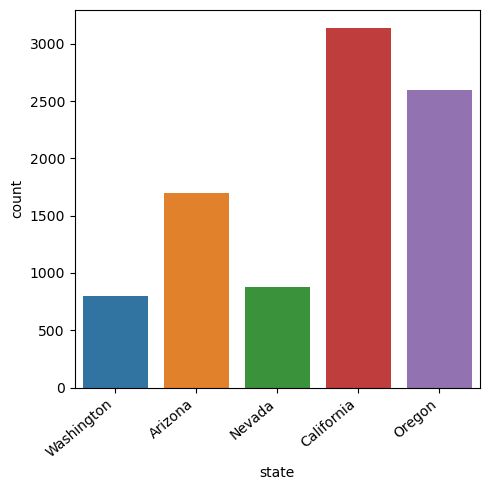

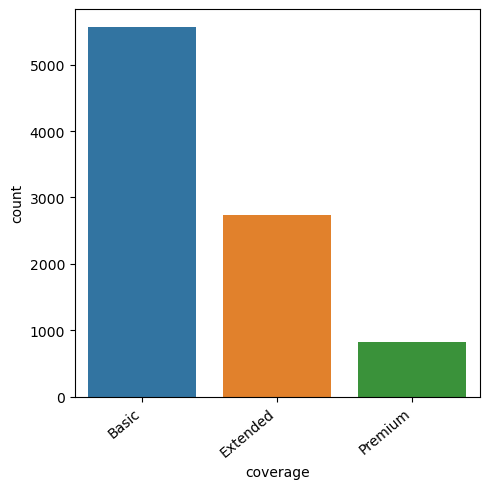

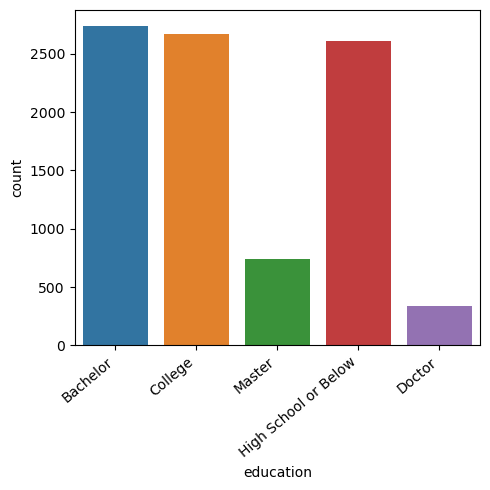

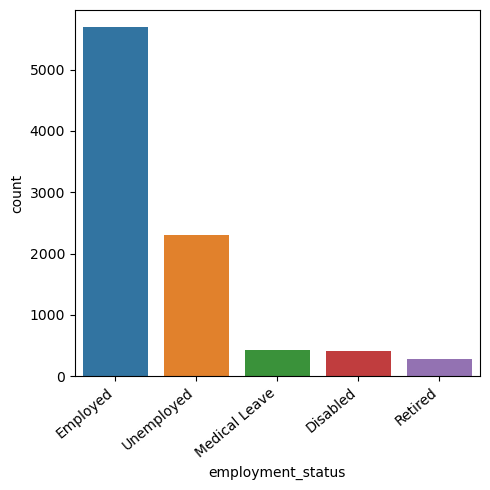

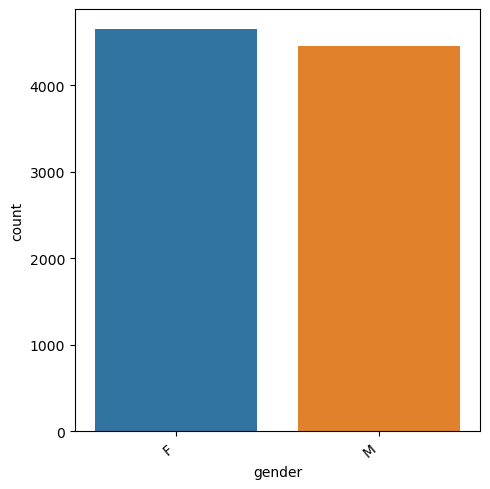

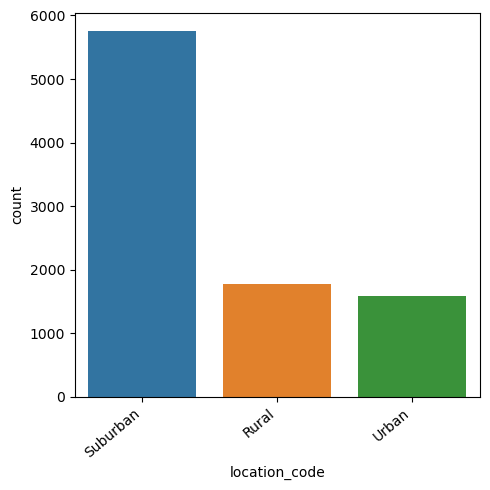

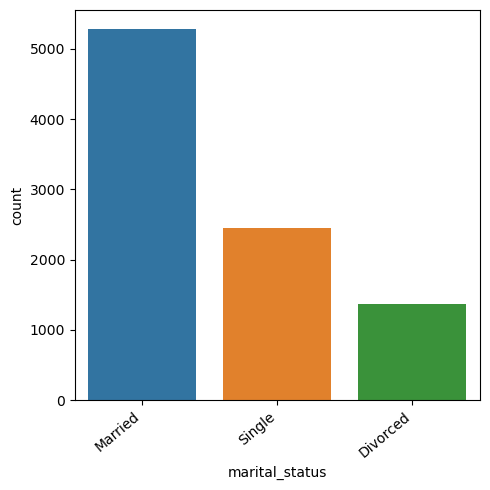

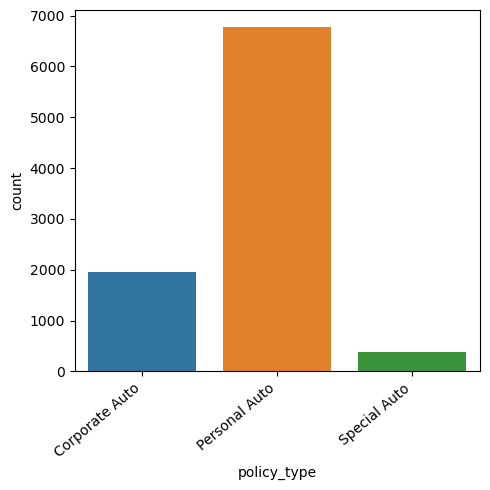

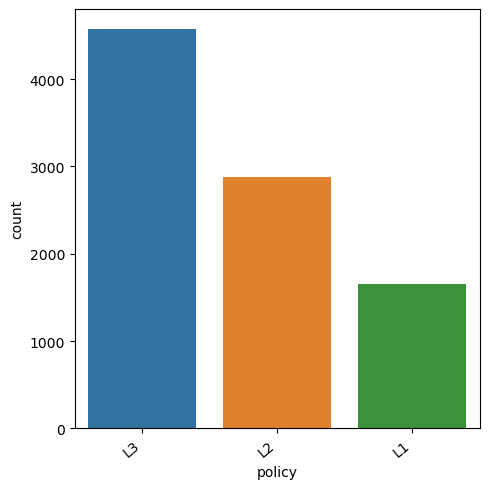

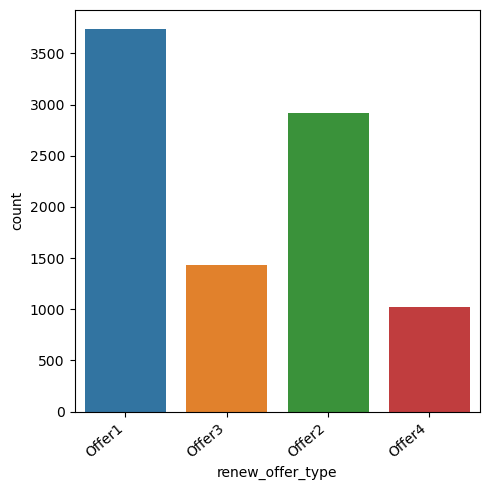

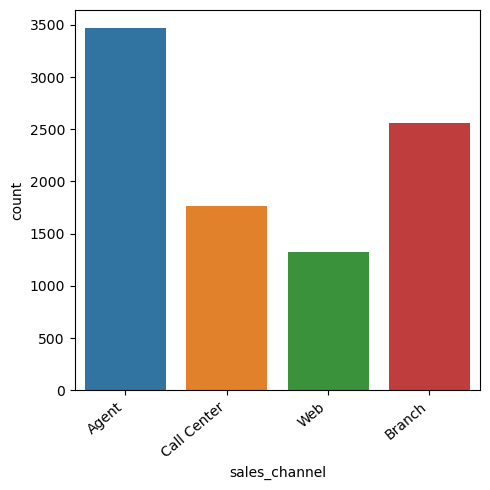

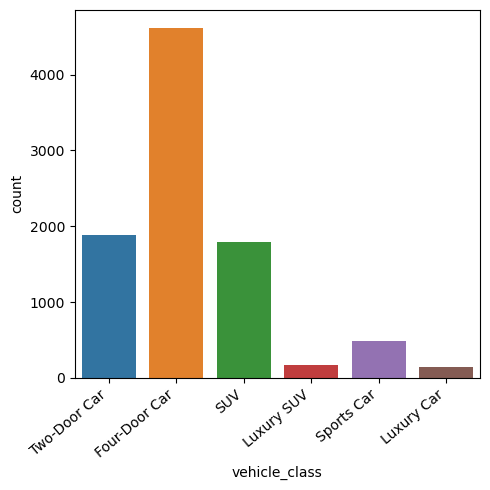

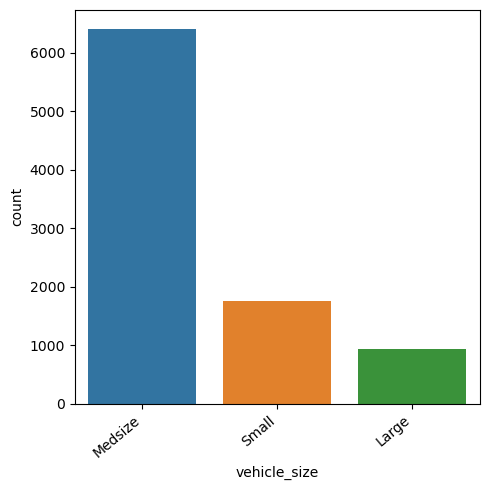

In [49]:
def plot_categorical_countplot(categorical_df):
    for column in categorical_df.columns:
        plt.figure(figsize=(5, 5))
        
        ax = sns.countplot(x=column, data=categorical_df)
        #ax = sns.histplot(data=categorical_df, x=column, stat="percent")#, multiple="dodge", shrink=.8)

        #rotating the ticklabels on the x-asis:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.tight_layout()
        plt.show()

plot_categorical_countplot(categorical_df)

In [50]:
categorical_df['vehicle_class']= np.where(categorical_df['vehicle_class'].isin(['Sports Car', 'Luxury SUV']), 'Luxury Car', categorical_df['vehicle_class'])

In [51]:
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1795
Luxury Car        805
Name: vehicle_class, dtype: int64

In [52]:
categorical_df.value_counts()

state       coverage  education             employment_status  gender  location_code  marital_status  policy_type    policy  renew_offer_type  sales_channel  vehicle_class  vehicle_size
Arizona     Basic     Master                Employed           M       Rural          Divorced        Personal Auto  L3      Offer2            Branch         Four-Door Car  Small           4
Oregon      Basic     Bachelor              Unemployed         F       Suburban       Single          Personal Auto  L3      Offer1            Agent          Four-Door Car  Medsize         4
California  Premium   Master                Employed           M       Rural          Married         Personal Auto  L2      Offer1            Agent          Two-Door Car   Medsize         4
            Basic     High School or Below  Employed           M       Urban          Married         Personal Auto  L2      Offer2            Agent          Four-Door Car  Large           3
                      Bachelor              Medica

In [53]:

customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [54]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9107, dtype: datetime64[ns]

In [55]:
from datetime import datetime

import matplotlib.pyplot
import matplotlib.dates

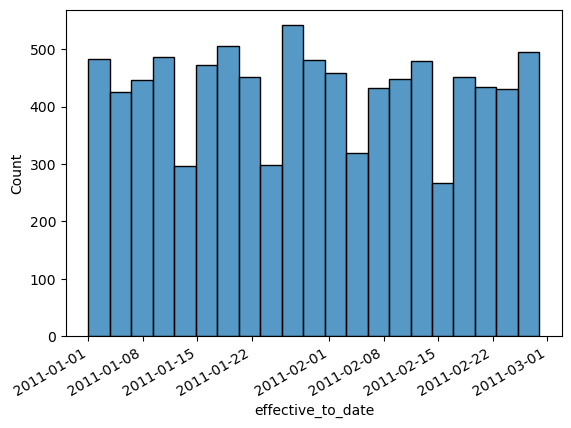

In [56]:
sns.histplot(data=customer_df['total_claim_amount'], x=customer_df['effective_to_date'])
plt.gcf().autofmt_xdate()

In [57]:

customer_df['etd_day'] = customer_df['effective_to_date'].dt.day
customer_df['etd_week'] = customer_df['effective_to_date'].dt.isocalendar().week
customer_df['etd_month'] = customer_df['effective_to_date'].dt.month
customer_df['etd_year'] = customer_df['effective_to_date'].dt.year
customer_df.head()

customer       state  customer_lifetime_value  response  coverage education  \
0  BU79786  Washington              2763.519279     False     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903     False  Extended  Bachelor   
2  AI49188      Nevada             12887.431650     False   Premium  Bachelor   
3  WW63253  California              7645.861827     False     Basic  Bachelor   
4  HB64268  Washington              2813.692575     False     Basic  Bachelor   

  effective_to_date employment_status gender  income  ...        policy  \
0        2011-02-24          Employed      F   56274  ...  Corporate L3   
1        2011-01-31        Unemployed      F       0  ...   Personal L3   
2        2011-02-19          Employed      F   48767  ...   Personal L3   
3        2011-01-20        Unemployed      M       0  ...  Corporate L2   
4        2011-02-03          Employed      M   43836  ...   Personal L1   

  renew_offer_type  sales_channel  total_claim_amount  vehicle_class  \
0           Offer1          Agent          384.811147   Two-Door Car   
1           Offer3          Agent         1131.464935  Four-Door Car   
2           Offer1          Agent          566.472247   Two-Door Car   
3           Offer1    Call Center          529.881344            SUV   
4           Offer1          Agent          138.130879  Four-Door Car   

   vehicle_size  etd_day etd_week etd_month etd_year  
0       Medsize       24        8         2     2011  
1       Medsize       31        5         1     2011  
2       Medsize       19        7         2     2011  
3       Medsize       20        3         1     2011  
4       Medsize        3        5         2     2011  

[5 rows x 28 columns]

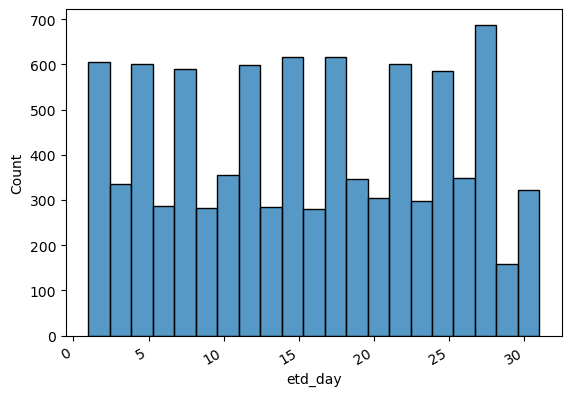

In [58]:
sns.histplot(data=customer_df['total_claim_amount'], x=customer_df['etd_day'])
plt.gcf().autofmt_xdate()

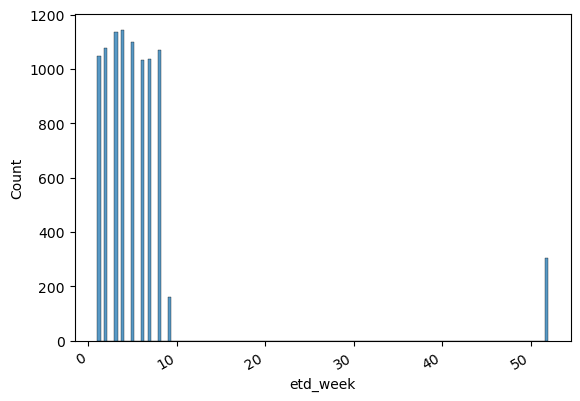

In [59]:
sns.histplot(data=customer_df['total_claim_amount'], x=customer_df['etd_week'])
plt.gcf().autofmt_xdate()

(1.0, 12.0)

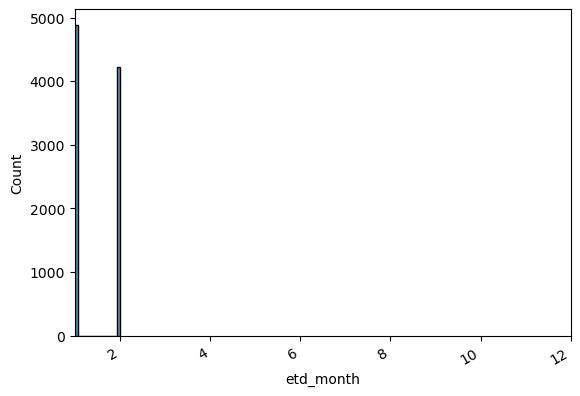

In [60]:
ax = sns.histplot(data=customer_df['total_claim_amount'], x=customer_df['etd_month'])
plt.gcf().autofmt_xdate()
ax.set_xlim(1,12)

(2008.0, 2015.0)

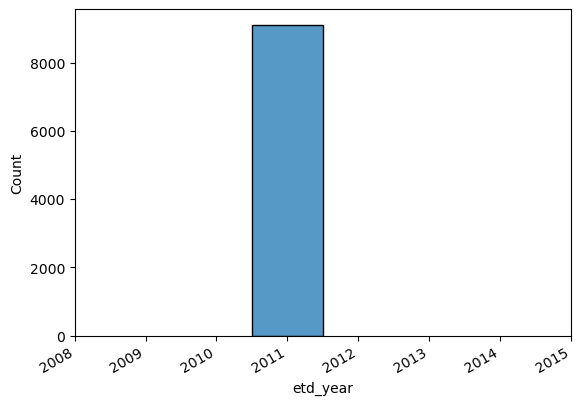

In [61]:
ax = sns.histplot(data=customer_df['total_claim_amount'], x=customer_df['etd_year'])
plt.gcf().autofmt_xdate()
ax.set_xlim(2008,2015)

In [62]:
# end of lab feature revision

In [63]:
# data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [64]:
# data.to_excel("we_fn_use_c_marketing_customer_value_analysis.xlsx")

In [65]:
# data.to_excel('we_fn_use_c_marketing_customer_value_analysis.xlsx', index=False)

In [66]:
# Lab | Comparing regression models
# For this lab, we will be using the same dataset we used in the previous labs. 
#Load the cleaned categorical and numerical dataframes that you saved at the end of Monday's labs.

In [67]:
numerical = pd.read_csv('numerical.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'numerical.csv'

In [68]:
categorical = pd.read_csv('categorical.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'categorical.csv'

In [69]:
import pandas as pd

In [70]:
# Instructions
# Concatenate Numerical and Categorical dataframes into one dataframe called data.

In [71]:
data = pd.concat([numerical, categorical])

NameError: name 'numerical' is not defined

In [72]:
data.head()

NameError: name 'data' is not defined

In [73]:
numerical = pd.read_csv('numerical_no_index.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'numerical_no_index.csv'

In [74]:
categorical = pd.read_csv('categorical_no_index.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'categorical_no_index.csv'

In [75]:
data = pd.concat([numerical, categorical])

NameError: name 'numerical' is not defined

In [76]:
data.head()

NameError: name 'data' is not defined

In [77]:
# data.to_excel("data.xlsx")

In [78]:
# data.to_csv('data.csv')

In [79]:
# data.to_csv('data_no_index.csv', index=False)

In [80]:
# data.to_excel('data_no_index.xlsx', index=False)

In [81]:
# Concatenate Numerical and Categorical dataframes into one dataframe called data.
# 1.In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
# 2.Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)
# 3.Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.
# 4.Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)
# 5.The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
# 6.Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [82]:
# 1.In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [83]:
# 1 Import sklearn train_test_split and separate the data.
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [84]:
# 1.....and separate the data.

In [85]:
data.head()

NameError: name 'data' is not defined

In [86]:
# 1.....and separate the data.

In [87]:
data = data.select_dtypes(np.number)
data.shape

NameError: name 'data' is not defined

In [88]:
X = data.drop(['total_claim_amount'],axis=1)
y = data['total_claim_amount']

NameError: name 'data' is not defined

In [89]:
display(X.shape)
display(y.shape)

NameError: name 'X' is not defined

In [90]:
# 2.Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [91]:
X_train_cat, X_train_num, X_test_cat , X_test_num = train_test_split(X, y, test_size=0.2, random_state=900)

NameError: name 'X' is not defined

In [92]:
display(X_train_cat.shape)
display(X_train_num.shape)
display(X_test_cat.shape)
display(X_test_num.shape)

NameError: name 'X_train_cat' is not defined

In [93]:
# 3.Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

In [94]:
numericals_train = X_train_num.select_dtypes(np.number)
numericals_test = X_test_num.select_dtypes(np.number)
numericals_train.head()

NameError: name 'X_train_num' is not defined

In [95]:
numericals_train = X_train_num(np.number)
numericals_test = X_test_num(np.number)
numericals_train.head()

NameError: name 'X_train_num' is not defined

In [96]:
data = X_train_num(np.number)
data = X_test_num(np.number)
data_train.head()

NameError: name 'X_train_num' is not defined

In [97]:
data.head()

NameError: name 'data' is not defined

In [98]:
numerical_df = customer_df.select_dtypes(np.number)
numerical_df.shape
numerical_df = numerical_df.drop('etd_year', axis=1)
numerical_df.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  etd_day  \
0                          0                   1          384.811147       24   
1                          0                   8         1131.464935       31   
2                          0                   2          566.472247       19   
3                          0                   7          529.881344       20   
4                          0                   1          138.130879        3   

   etd_week  etd_month  
0         8          2  
1         5          1  
2         7          2  
3         3          1  
4         5          2

In [99]:
categorical_df.shape

(9107, 13)

In [100]:
data = pd.concat([categorical_df, numerical_df],axis=1)
data.shape

(9107, 24)

In [101]:
data_copy = data.copy()
data_copy.shape

(9107, 24)

In [102]:
X = data_copy.drop(['total_claim_amount'],axis=1)
y = data_copy['total_claim_amount']

In [103]:
display(X.shape)
display(y.shape)

(9107, 23)

(9107,)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=900)

In [105]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(7285, 23)

(1822, 23)

(7285,)

(1822,)

In [106]:
discrete_df, continuous_df = diff_continuous_discrete(data_copy)

monthly_premium_auto  months_since_last_claim  \
0                    69                       32   
1                    94                       13   
2                   108                       18   
3                   106                       18   
4                    73                       12   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   number_of_policies  etd_day  etd_week  etd_month  
0                   1       24         8          2  
1                   8       31         5          1  
2                   2       19         7          2  
3                   7       20         3          1  
4                   1        3         5          2

customer_lifetime_value  income  total_claim_amount
0              2763.519279   56274          384.811147
1              6979.535903       0         1131.464935
2             12887.431650   48767          566.472247
3              7645.861827       0          529.881344
4              2813.692575   43836          138.130879

In [107]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

customer_lifetime_value  income  monthly_premium_auto  \
8487              4698.345864   26411                   126   
9074              2966.944264       0                    81   
5250             11578.126430       0                   115   
6009              5000.619360   43723                    66   
2065              2502.637401       0                    66   

      months_since_last_claim  months_since_policy_inception  \
8487                       25                              9   
9074                       14                             75   
5250                       21                             46   
6009                       31                             61   
2065                        8                             11   

      number_of_open_complaints  number_of_policies  etd_day  etd_week  \
8487                          1                   1        9         1   
9074                          0                   1       19         7   
5250                          0                   2       13         2   
6009                          3                   7       14         7   
2065                          0                   1       15         2   

      etd_month  
8487          1  
9074          2  
5250          1  
6009          2  
2065          1

In [108]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [109]:
pd.DataFrame(numericals_train_standardized).head()

0         1         2         3         4         5         6  \
0 -0.491786 -0.373139  0.969614  1.000355 -1.391704  0.675355 -0.821327   
1 -0.754174 -1.238642 -0.357666 -0.098949  0.969404 -0.424815 -0.821327   
2  0.550825 -1.238642  0.645168  0.600608 -0.068052 -0.424815 -0.399428   
3 -0.445977  0.194184 -0.800093  1.599975  0.468563  2.875695  1.710065   
4 -0.824539 -1.238642 -0.800093 -0.698569 -1.320155 -0.424815 -0.821327   

          7         8         9  
0 -0.743170 -0.582902 -0.932409  
1  0.413790  0.097399  1.072491  
2 -0.280386 -0.469519 -0.932409  
3 -0.164690  0.097399  1.072491  
4 -0.048994 -0.469519 -0.932409

In [110]:
categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
categoricals_train.shape

(7285, 13)

In [111]:
categoricals_train_ordinal = pd.DataFrame()
categoricals_test_ordinal = pd.DataFrame()

In [112]:
categoricals_train_ordinal['coverage'] = categoricals_train["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
categoricals_train_ordinal['employment_status'] = categoricals_train["employment_status"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})
categoricals_train_ordinal['location_code'] = categoricals_train["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
categoricals_train_ordinal['vehicle size'] = categoricals_train["vehicle size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})
categoricals_train_ordinal.head()

KeyError: 'vehicle size'

In [113]:
categoricals_train_ordinal['coverage'] = categoricals_train["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
categoricals_train_ordinal['employment_status'] = categoricals_train["employment_status"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})
categoricals_train_ordinal['location_code'] = categoricals_train["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
categoricals_train_ordinal.head()

coverage  employment_status  location_code
8487         1                  2              0
9074         1                  1              0
5250         0                  1              0
6009         0                  0              0
2065         0                  1              1

In [114]:
categoricals_test_ordinal['coverage'] = categoricals_test["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
categoricals_test_ordinal['employment_status'] = categoricals_test["employment_status"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})
categoricals_test_ordinal['location_code'] = categoricals_test["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
categoricals_test_ordinal.head()

coverage  employment_status  location_code
8178         1                  0              0
2499         1                  1              0
8779         0                  0              2
746          0                  0              1
4624         0                  0              1

In [115]:
categoricals_train_onehot= categoricals_train.drop(['coverage','employment_status','location_code' ], axis=1)
categoricals_train_onehot.shape # we lost 3 columns - ok!
categoricals_test_onehot=categoricals_test.drop(['coverage','employment_status','location_code' ], axis=1)
categoricals_test_onehot.shape # we lost 3 columns - ok!

(1822, 10)

In [116]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train_onehot)
categoricals_train_encoded = encoder.transform(categoricals_train_onehot).toarray()
categoricals_test_encoded = encoder.transform(categoricals_test_onehot).toarray()

In [117]:
encoder.categories_

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
       dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['L1', 'L2', 'L3'], dtype=object),
 array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object),
 array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object),
 array(['Four-Door Car', 'Luxury Car', 'SUV', 'Two-Door Car'], dtype=object),
 array(['Large', 'Medsize', 'Small'], dtype=object)]

In [118]:
X_train_processed = np.concatenate((categoricals_train_ordinal, categoricals_train_encoded, numericals_train_standardized),axis=1)
X_test_processed = np.concatenate((categoricals_test_ordinal, categoricals_test_encoded, numericals_test_standardized),axis=1)

In [119]:
pd.DataFrame(X_train_processed).select_dtypes(np.object)

C:\Users\it-it\AppData\Local\Temp\ipykernel_10292\2069501818.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pd.DataFrame(X_train_processed).select_dtypes(np.object)


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[7285 rows x 0 columns]

In [120]:
# simple linear regression with all the data

In [121]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [122]:
LR = linear_model.LinearRegression()
LR.fit(X_train_processed,y_train)

LinearRegression()

In [123]:
y_predicted_train = LR.predict(X_train_processed)
R2_train = r2_score(y_train, y_predicted_train)
print("R2-train-score is ", R2_train)

R2-train-score is  0.6169181662084324


In [124]:
y_predicted_test = LR.predict(X_test_processed)
R2_test = r2_score(y_test, y_predicted_test)
print("R2-test-score is ", R2_test)

R2-test-score is  0.6279054021150501


In [125]:
# define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [126]:
def models_train(model, X_train_processed, y_train, X_test_processed, y_test):
    #to use the LR-Model import:
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.metrics import mean_absolute_error
    #to use the KNN-Model import:
    from sklearn.neighbors import KNeighborsRegressor
    #to use the MLP-Model import:
    from sklearn.neural_network import MLPRegressor
    from sklearn.neural_network import MLPClassifier

    train = {"LR":[],"KNN":[],"MLPR":[]}
    scores = {"LR":[],"KNN":[],"MLPR":[]}

    for m in model:
        if (m == 'LR'):
            model = linear_model.LinearRegression()
            model.fit(X_train_processed,y_train)
            y_predicted_train = LR.predict(X_train_processed)
            train[m].append(r2_score(y_train, y_predicted_train))
            scores[m].append(r2_score(y_test, y_predicted_test))
        elif (m == 'KNN'):
            for k in range(2,25):
                model = KNeighborsRegressor(n_neighbors=k)
                model.fit(X_train_processed, y_train)
                scores[m].append(model.score(X_test_processed, y_test))
                train[m].append(model.score(X_train_processed, y_train))
        elif (m == 'MLPR'):
            model = MLPRegressor(solver='lbfgs')
            model.fit(X_train_processed, y_train)
            train[m].append(r2_score(y_train, y_predicted_train))
            scores[m].append(r2_score(y_test, y_predicted_test))        
        else:
            print("The model selected is not supported yet")
    
    print("The model with the best score is,", max(scores, key=scores.get), "with a score of:", scores[max(scores, key=scores.get)])
    return scores, train

In [127]:
model = ['LR' ,'KNN']

scores, train = models_train(model, X_train_processed,y_train,X_test_processed,y_test)

The model with the best score is, LR with a score of: [0.6279054021150501]


In [128]:
scores

{'LR': [0.6279054021150501],
 'KNN': [0.5488308088052076,
  0.5963224957426041,
  0.6204578242145949,
  0.6337220226025619,
  0.6340492611673043,
  0.636404023034447,
  0.6360757268162651,
  0.6331112874294653,
  0.631947999721829,
  0.6342015714724736,
  0.6330291406571082,
  0.6337815468047998,
  0.633124881203516,
  0.6344224462824914,
  0.631150243880535,
  0.6320453296314616,
  0.6285567639909981,
  0.6257032414701333,
  0.6241792550891654,
  0.6217864353712317,
  0.6207715058083275,
  0.6208663687783587,
  0.6210660883283692],
 'MLPR': []}

In [129]:
model = ['LR' ,'KNN', 'MLPR']

scores, train = models_train(model, X_train_processed,y_train,X_test_processed,y_test)

The model with the best score is, LR with a score of: [0.6279054021150501]


C:\Users\it-it\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [130]:
# Check and discuss the results.
# The first LR-Model gives us the best result with a score of [0.6279]. The KNN-Model gives a better result with a k-value in the range [4, 17].

In [131]:
# Lab | Random variable distributions
# Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

# Instructions
# 1 Get the numerical variables from our dataset.
# 2 Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
# 3 Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [132]:

# 1 Get the numerical variables from our dataset.

In [133]:
numerical_df_lab = data_copy.select_dtypes(np.number)

In [134]:
# 2 Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.


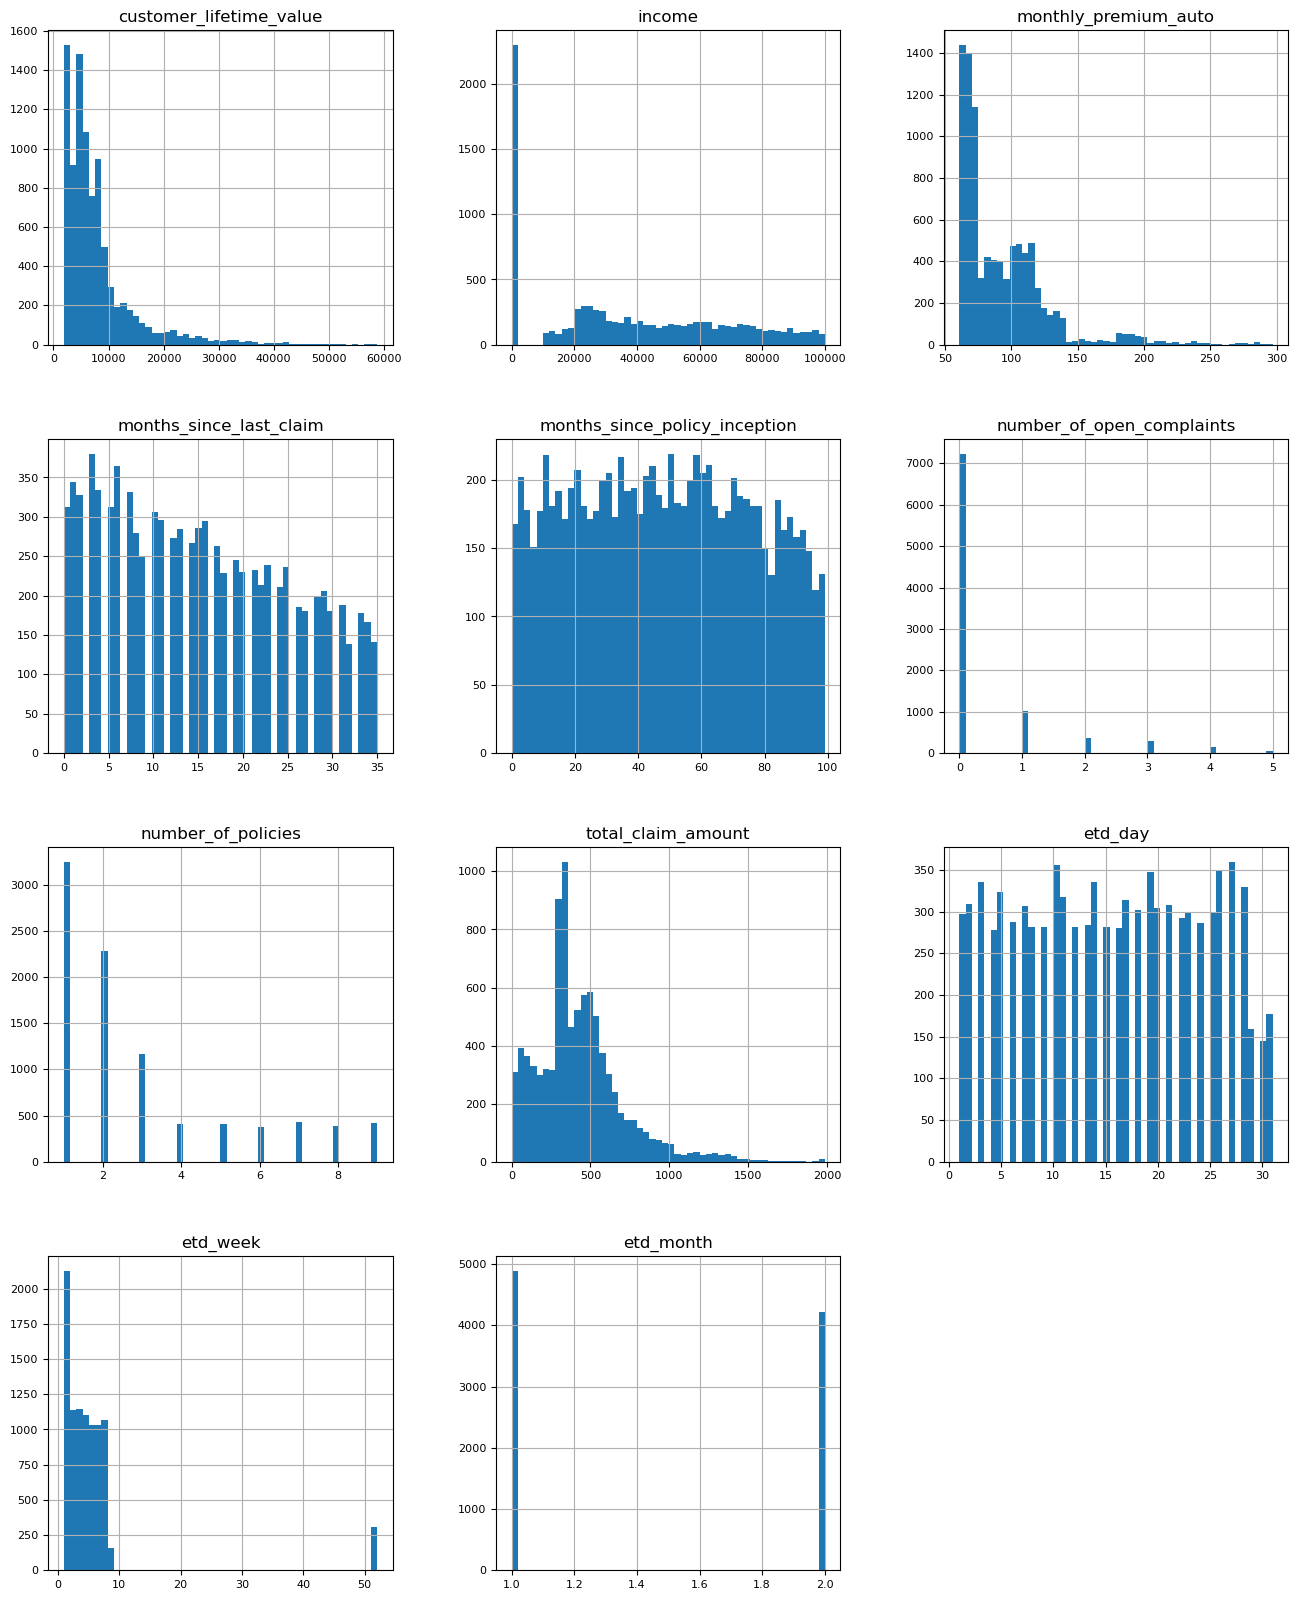

In [135]:
plot_discrete(numerical_df_lab)

In [136]:
# 3 Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [137]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numerical_df_lab)
numerical_df_lab_standardized = transformer.transform(numerical_df_lab)
numerical_df_lab_standardized = pd.DataFrame(numerical_df_lab_standardized, columns=numerical_df_lab.columns)

In [138]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(numerical_df_lab)
numerical_df_lab_minmaxised = transformer.transform(numerical_df_lab)
numerical_df_lab_minmaxised = pd.DataFrame(numerical_df_lab_minmaxised, columns=numerical_df_lab.columns)

In [139]:
def log_transfom_clean(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

In [140]:
numerical_df_lab_log = pd.DataFrame()

for column in numerical_df_lab:
    numerical_df_lab_log[column] = list(map(log_transfom_clean, numerical_df_lab[column]))

numerical_df_lab_log

C:\Users\it-it\AppData\Local\Temp\ipykernel_10292\312512766.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)
C:\Users\it-it\AppData\Local\Temp\ipykernel_10292\312512766.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)
C:\Users\it-it\AppData\Local\Temp\ipykernel_10292\312512766.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)
C:\Users\it-it\AppData\Local\Temp\ipykernel_10292\312512766.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


customer_lifetime_value    income  monthly_premium_auto  \
0                    3.441462  4.750308              1.838849   
1                    3.843827  0.000000              1.973128   
2                    4.110166  4.688126              2.033424   
3                    3.883426  0.000000              2.025306   
4                    3.449277  4.641831              1.863323   
...                       ...       ...                   ...   
9102                 4.369327  4.856976              1.863323   
9103                 3.490873  4.334534              1.897627   
9104                 3.911897  0.000000              1.929419   
9105                 3.876474  4.341256              1.982271   
9106                 3.416946  0.000000              1.886491   

      months_since_last_claim  months_since_policy_inception  \
0                    1.505150                       0.698970   
1                    1.113943                       1.623249   
2                    1.255273                       1.579784   
3                    1.255273                       1.812913   
4                    1.079181                       1.643453   
...                       ...                            ...   
9102                 1.255273                       1.949390   
9103                 1.146128                       1.447158   
9104                 0.954243                       1.568202   
9105                 1.531479                       0.477121   
9106                 0.477121                       1.954243   

      number_of_open_complaints  number_of_policies  total_claim_amount  \
0                      0.000000            0.000000            2.585248   
1                      0.000000            0.903090            3.053641   
2                      0.000000            0.301030            2.753179   
3                      0.000000            0.845098            2.724179   
4                      0.000000            0.000000            2.140291   
...                         ...                 ...                 ...   
9102                   0.000000            0.301030            2.297180   
9103                   0.000000            0.000000            2.578868   
9104                   0.477121            0.301030            2.898058   
9105                   0.000000            0.477121            2.839604   
9106                   0.000000            0.000000            2.567732   

       etd_day  etd_week  etd_month  
0     1.380211  0.903090    0.30103  
1     1.491362  0.698970    0.00000  
2     1.278754  0.845098    0.30103  
3     1.301030  0.477121    0.00000  
4     0.477121  0.698970    0.30103  
...        ...       ...        ...  
9102  1.000000  0.778151    0.30103  
9103  1.079181  0.778151    0.30103  
9104  0.778151  0.698970    0.30103  
9105  0.477121  0.698970    0.30103  
9106  1.146128  0.845098    0.30103  

[9107 rows x 11 columns]

In [141]:
# numerical_df_lab_log = np.log10(numerical_df_lab).where(numerical_df_lab_log.isin([np.inf, -np.inf]), '0', numerical_df_lab_log)
# numerical_df_lab_log = np.where(numerical_df_lab_log.isin([np.inf, -np.inf]), '0', numerical_df_lab_log)
# numerical_df_lab_log = pd.DataFrame(numerical_df_lab_log, columns=numerical_df_lab.columns)
# numerical_df_lab_log

C:\Users\it-it\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
C:\Users\it-it\AppData\Local\Temp\ipykernel_10292\3376289187.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.where except for the arguments 'cond' and 'other' will be keyword-only.
  numerical_df_lab_log = np.log10(numerical_df_lab).where(numerical_df_lab_log.isin([np.inf, -np.inf]), '0', numerical_df_lab_log)


ValueError: For argument "inplace" expected type bool, received type DataFrame.

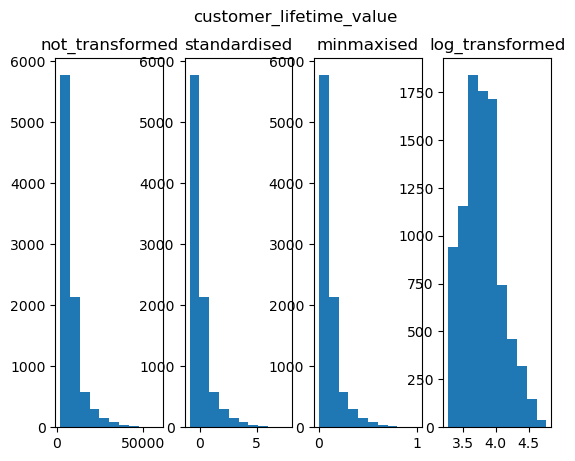

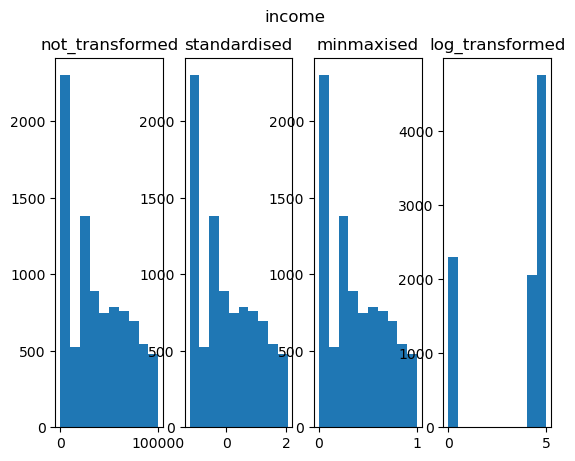

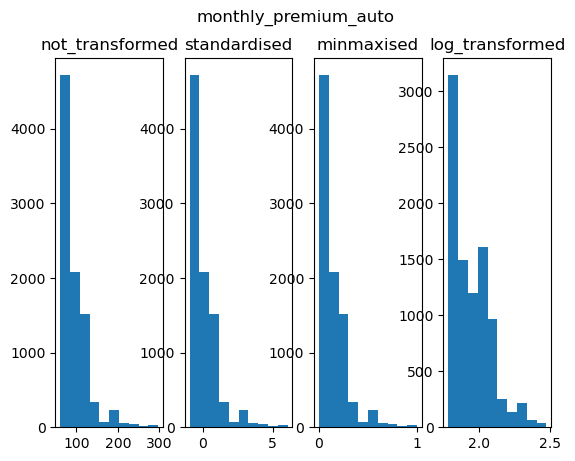

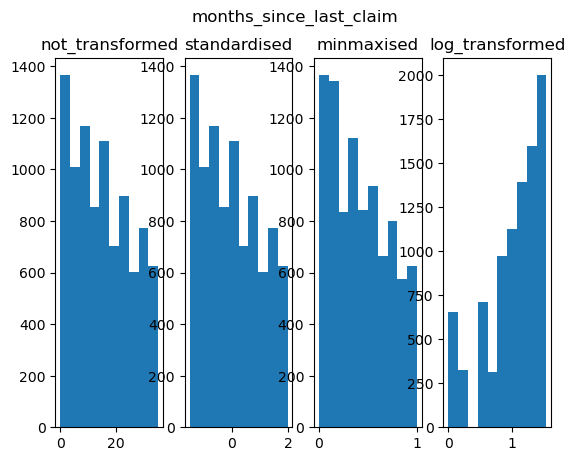

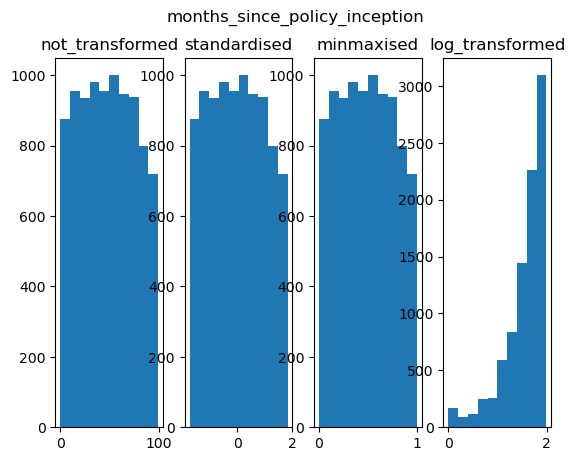

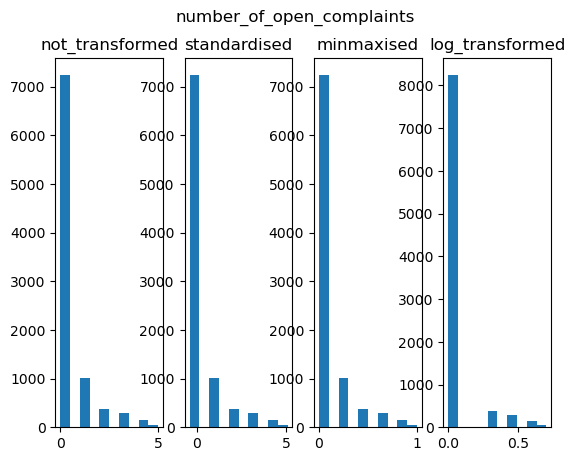

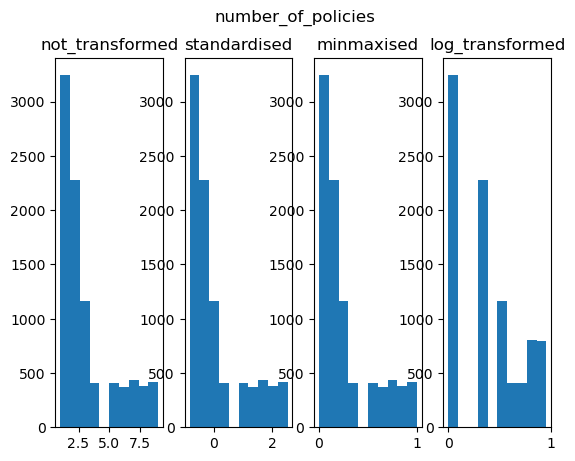

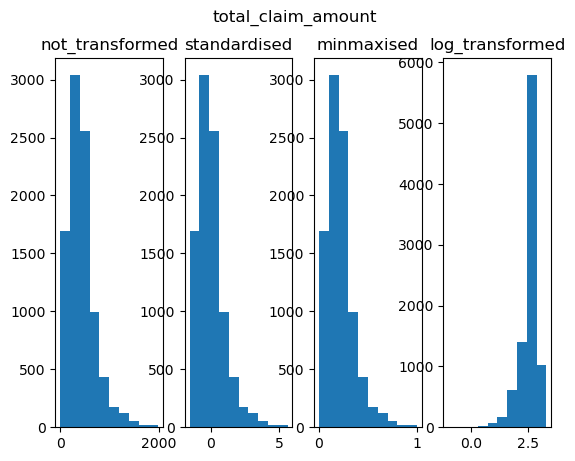

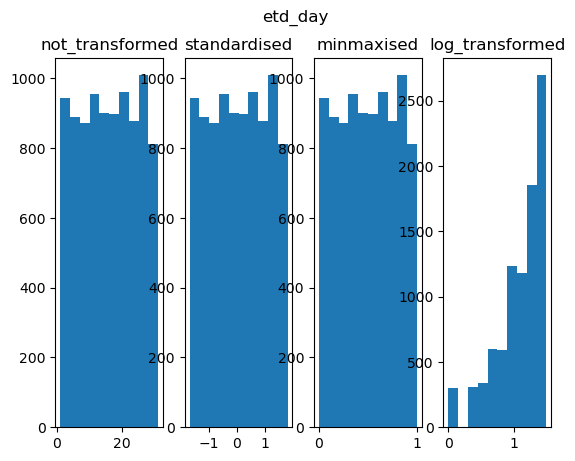

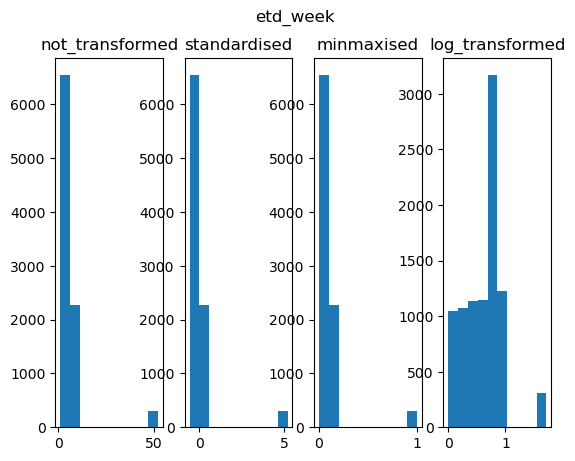

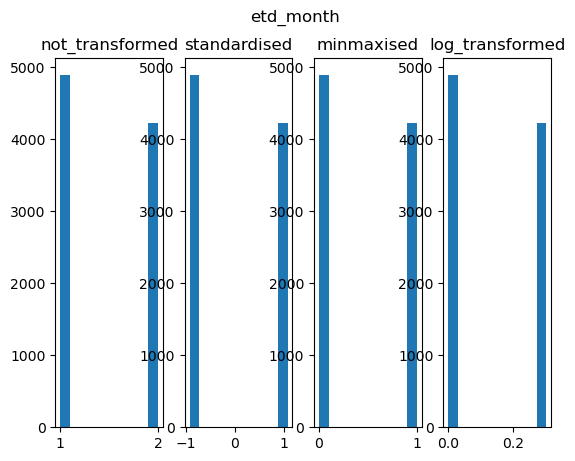

In [142]:
column_names = numerical_df_lab.columns.values.tolist()

for i in column_names:
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4)
    fig.suptitle(i)
    ax0.hist(numerical_df_lab[i])
    ax0.set_title('not_transformed')
    ax1.hist(numerical_df_lab_standardized[i])
    ax1.set_title('standardised')
    ax2.hist(numerical_df_lab_minmaxised[i])
    ax2.set_title('minmaxised')
    ax3.hist(numerical_df_lab_log[i])
    ax3.set_title('log_transformed')

In [143]:
# Minmaxisation  and standardisation do not really impact distribution. Log-Transformation impacts especially on:

# customer_lifetime_value: distribution gets more "normal"
# income: with the log-transformation a lot of "0" income were dropped, i.e. important loss of information.
# monthly_premium_auto: small difference
# months_since_last_claim: tilted to the left and not to the right anymore.
# months_since_policy_inception: toughly tilted to the left and not uniform anymore.
# number_of_open_complaints: small difference
# number_of_policies: small difference
# total_claim_amount: tilted to the left and not to the right anymore
# etd_day: toughly tilted to the left and not uniform anymore.
# etd_week: small difference
# etd_month: small difference
